<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-확인" data-toc-modified-id="1.-데이터-확인-1">1. 데이터 확인</a></span></li><li><span><a href="#2.-데이터-병합" data-toc-modified-id="2.-데이터-병합-2">2. 데이터 병합</a></span></li><li><span><a href="#3.-EDA" data-toc-modified-id="3.-EDA-3">3. EDA</a></span><ul class="toc-item"><li><span><a href="#3.1-평균거래량-상위-10개-기업" data-toc-modified-id="3.1-평균거래량-상위-10개-기업-3.1">3.1 평균거래량 상위 10개 기업</a></span></li><li><span><a href="#3.2-거래대금-상위-10개-기업" data-toc-modified-id="3.2-거래대금-상위-10개-기업-3.2">3.2 거래대금 상위 10개 기업</a></span></li><li><span><a href="#3.3-업종별-거래량-평균" data-toc-modified-id="3.3-업종별-거래량-평균-3.3">3.3 업종별 거래량 평균</a></span></li><li><span><a href="#3.4-업종별-거래대금-평균" data-toc-modified-id="3.4-업종별-거래대금-평균-3.4">3.4 업종별 거래대금 평균</a></span></li></ul></li></ul></div>

# 1. 데이터 확인

- **등락률이 -인 행은 제외**하고, 거래량과 전일거래량 컬럼의 평균을 구하여 **2일치 평균거래량 컬럼 추가**


- **평균거래량과 거래대금 내림차순으로 정렬**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 거래량상위 데이터 로드
data_1 = pd.read_csv('./data/네이버금융_거래량.csv')
data_1.head()

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,시가총액,PER,PBR
0,서울식품,330.0,60.0,+22.22%,1.184037e+09,371437.0,373127685.0,1202.0,-82.50,4.54
1,이화전기,320.0,0.0,0.00%,1.037267e+09,330446.0,484677142.0,2299.0,-24.62,1.23
2,이아이디,502.0,45.0,-8.23%,9.143304e+08,472333.0,273589027.0,3631.0,-26.42,2.33
3,이트론,834.0,99.0,+13.47%,9.036287e+08,699841.0,262437907.0,4375.0,-34.75,6.50
4,KODEX 200선물인버스2X,2080.0,45.0,-2.12%,5.863714e+08,1255173.0,373295811.0,22256.0,NaN,NaN


In [3]:
# 등락률이 -인 행 제외
data_1 = data_1[~data_1.등락률.str.contains("-")].reset_index(drop=True)
data_1.head()

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,시가총액,PER,PBR
0,서울식품,330.0,60.0,+22.22%,1.184037e+09,371437.0,373127685.0,1202.0,-82.50,4.54
1,이화전기,320.0,0.0,0.00%,1.037267e+09,330446.0,484677142.0,2299.0,-24.62,1.23
2,이트론,834.0,99.0,+13.47%,9.036287e+08,699841.0,262437907.0,4375.0,-34.75,6.50
3,세종텔레콤,716.0,0.0,0.00%,1.365789e+08,100791.0,382121828.0,4298.0,238.67,1.31
4,유니온머티리얼,4720.0,510.0,+12.11%,1.291247e+08,620070.0,21281941.0,1982.0,-112.38,2.32


In [4]:
# 2일치 평균거래량 컬럼 추가
data_1['평균거래량'] = (data_1['거래량'] + data_1['전일거래량'])/2
data_1 = data_1.sort_values(by=['평균거래량','거래대금'], ascending=False).reset_index(drop=True)
data_1.head()

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,시가총액,PER,PBR,평균거래량
0,서울식품,330.0,60.0,+22.22%,1.184037e+09,371437.0,373127685.0,1202.0,-82.50,4.54,778582547.0
1,이화전기,320.0,0.0,0.00%,1.037267e+09,330446.0,484677142.0,2299.0,-24.62,1.23,760972311.5
2,이트론,834.0,99.0,+13.47%,9.036287e+08,699841.0,262437907.0,4375.0,-34.75,6.50,583033295.5
3,세종텔레콤,716.0,0.0,0.00%,1.365789e+08,100791.0,382121828.0,4298.0,238.67,1.31,259350348.0
4,유니온머티리얼,4720.0,510.0,+12.11%,1.291247e+08,620070.0,21281941.0,1982.0,-112.38,2.32,75203339.5


In [5]:
data_1 = data_1.rename(columns={'거래대금': '거래대금(백만)'})
data_1 = data_1[['종목명','등락률','평균거래량','거래대금(백만)']]
data_1.head()

,종목명,등락률,평균거래량,거래대금(백만)
0,서울식품,+22.22%,778582547.0,371437.0
1,이화전기,0.00%,760972311.5,330446.0
2,이트론,+13.47%,583033295.5,699841.0
3,세종텔레콤,0.00%,259350348.0,100791.0
4,유니온머티리얼,+12.11%,75203339.5,620070.0


# 2. 데이터 병합

- **저평가 된 기업들 중 평균거래량, 거래대금이 상위에 랭크되어 있는 데이터**들을 모아 데이터프레임 생성

In [6]:
# 저평가기업 데이터 로드
data_2 = pd.read_csv('./data/FnGuide_시가총액.csv')

# 종목코드 6자리로 수정
data_2.종목코드 = data_2.종목코드.map('{:06d}'.format)
data_2.tail()

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억)
362,대한제당,001790,"곡물가공품, 전분 및 전분제품 제조업",식품,29.07,9.23,0.40,"1,848"
363,삼양홀딩스,000070,기타 금융업,식품,29.07,19.26,0.49,"7,905"
364,한국테크놀로지그룹,000240,기타 금융업,자동차부품,46.67,18.53,0.61,"20,650"
365,메리츠화재,000060,보험업,손해보험,6.87,4.41,0.61,"18,154"
366,경방,000050,종합 소매업,"섬유,의류,신발,호화품",33.35,7.49,0.43,"3,386"


In [7]:
# 숫자 비교를 위해 타입 변환
data_2['시가총액(억)'] = data_2['시가총액(억)'].str.replace(',','')
data_2['시가총액(억)'] = data_2['시가총액(억)'].astype(float)

In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사명      367 non-null    object 
 1   종목코드     367 non-null    object 
 2   업종       367 non-null    object 
 3   업종2      367 non-null    object 
 4   업종PER    367 non-null    float64
 5   PER      367 non-null    float64
 6   PBR      367 non-null    float64
 7   시가총액(억)  367 non-null    float64
dtypes: float64(4), object(4)
memory usage: 23.1+ KB


In [9]:
# 저평가 & 거래상위 종목
l = []
for i in data_1['종목명']:
    if i in data_2['회사명'].unique():
        l.append(i)
print(l)

['한화생명', '크리스탈신소재', '경남스틸', 'NI스틸', '팬오션', '팬스타엔터프라이즈', '글로벌에스엠', 'KD', '대한해운', '문배철강', '티케이케미칼', '삼표시멘트', 'S&K폴리텍', '대원화성']


In [10]:
idx = []
for i in range(len(data_2)):
    if data_2['회사명'][i] in l:
        idx.append(i)
print(idx)

[26, 56, 70, 74, 94, 96, 145, 155, 159, 170, 192, 240, 256, 337]


In [11]:
# 데이터 병합 후 평균거래량 내림차순으로 정렬
m_data = pd.merge(data_1, data_2.loc[idx], how='right', left_on='종목명', right_on='회사명')
m_data = m_data[['회사명','종목코드','업종','업종2','업종PER','PER','PBR','시가총액(억)','등락률','평균거래량','거래대금(백만)']]
m_data

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억),등락률,평균거래량,거래대금(백만)
0,한화생명,088350,보험업,생명보험,12.49,11.41,0.16,26056.0,+4.53%,30371631.5,151330.0
1,크리스탈신소재,900250,기타 금융업,화학,69.00,4.86,0.40,1173.0,0.00%,8655658.0,23677.0
2,경남스틸,039240,1차 철강 제조업,철강,41.60,15.15,0.58,508.0,+4.06%,8135387.0,37428.0
3,NI스틸,008260,1차 철강 제조업,철강,41.60,11.35,0.74,867.0,+7.50%,7913834.5,53564.0
4,팬오션,028670,해상 운송업,해운사,116.29,19.11,0.85,25846.0,+5.99%,7913571.5,71613.0
5,팬스타엔터프라이즈,054300,일반 목적용 기계 제조업,자동차부품,46.67,39.23,0.94,389.0,+0.23%,7588159.0,4835.0
6,글로벌에스엠,900070,기타 금융업,자동차부품,46.67,37.01,0.72,615.0,+2.67%,6936360.5,9883.0
7,KD,044180,건물 건설업,건설,7.01,6.20,0.63,167.0,+29.47%,6183625.5,9868.0
8,대한해운,005880,해상 운송업,해운사,116.29,47.79,0.92,7939.0,+0.75%,4917724.0,18256.0
9,문배철강,008420,1차 철강 제조업,철강,41.60,13.98,0.56,677.0,+4.65%,4512813.5,29448.0


In [12]:
# 거래대금 내림차순으로 정렬
m_data2 = m_data.sort_values(by='거래대금(백만)', ascending=False).reset_index(drop=True)
m_data2

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억),등락률,평균거래량,거래대금(백만)
0,한화생명,088350,보험업,생명보험,12.49,11.41,0.16,26056.0,+4.53%,30371631.5,151330.0
1,팬오션,028670,해상 운송업,해운사,116.29,19.11,0.85,25846.0,+5.99%,7913571.5,71613.0
2,NI스틸,008260,1차 철강 제조업,철강,41.60,11.35,0.74,867.0,+7.50%,7913834.5,53564.0
3,S&K폴리텍,091340,전자부품 제조업,전자장비와기기,65.66,50.56,0.62,633.0,+4.89%,3160019.0,37881.0
4,경남스틸,039240,1차 철강 제조업,철강,41.60,15.15,0.58,508.0,+4.06%,8135387.0,37428.0
5,문배철강,008420,1차 철강 제조업,철강,41.60,13.98,0.56,677.0,+4.65%,4512813.5,29448.0
6,삼표시멘트,038500,기타 비금속 광물제품 제조업,건축자재,36.34,32.45,0.78,4912.0,+2.46%,4013295.0,25369.0
7,크리스탈신소재,900250,기타 금융업,화학,69.00,4.86,0.40,1173.0,0.00%,8655658.0,23677.0
8,티케이케미칼,104480,화학섬유 제조업,화학,69.00,26.62,0.90,2704.0,+4.78%,4389425.5,19026.0
9,대한해운,005880,해상 운송업,해운사,116.29,47.79,0.92,7939.0,+0.75%,4917724.0,18256.0


In [13]:
# 평균거래량 & 거래대금 내림차순으로 정렬
m_data3 = m_data.copy()
m_data3['순위'] = m_data['평균거래량'].rank() + m_data['거래대금(백만)'].rank()
m_data3 = m_data3.sort_values(by='순위', ascending=False).reset_index(drop=True)
m_data3.drop('순위', axis=1, inplace=True)
m_data3

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억),등락률,평균거래량,거래대금(백만)
0,한화생명,088350,보험업,생명보험,12.49,11.41,0.16,26056.0,+4.53%,30371631.5,151330.0
1,NI스틸,008260,1차 철강 제조업,철강,41.60,11.35,0.74,867.0,+7.50%,7913834.5,53564.0
2,팬오션,028670,해상 운송업,해운사,116.29,19.11,0.85,25846.0,+5.99%,7913571.5,71613.0
3,경남스틸,039240,1차 철강 제조업,철강,41.60,15.15,0.58,508.0,+4.06%,8135387.0,37428.0
4,크리스탈신소재,900250,기타 금융업,화학,69.00,4.86,0.40,1173.0,0.00%,8655658.0,23677.0
5,문배철강,008420,1차 철강 제조업,철강,41.60,13.98,0.56,677.0,+4.65%,4512813.5,29448.0
6,S&K폴리텍,091340,전자부품 제조업,전자장비와기기,65.66,50.56,0.62,633.0,+4.89%,3160019.0,37881.0
7,글로벌에스엠,900070,기타 금융업,자동차부품,46.67,37.01,0.72,615.0,+2.67%,6936360.5,9883.0
8,대한해운,005880,해상 운송업,해운사,116.29,47.79,0.92,7939.0,+0.75%,4917724.0,18256.0
9,삼표시멘트,038500,기타 비금속 광물제품 제조업,건축자재,36.34,32.45,0.78,4912.0,+2.46%,4013295.0,25369.0


In [14]:
m_data.to_csv('./data/테마주저평가기업_평균거래량.csv', index=False)
m_data2.to_csv('./data/테마주저평가기업_거래대금.csv', index=False)
m_data3.to_csv('./data/테마주저평가기업_거래량&거래대금.csv', index=False)

평균거래량 내림차순으로 할지, 거래대금 내림차순으로 할지, 아니면 두 항목의 평균 순으로 할지 추후 결정

# 3. EDA

## 3.1 평균거래량 상위 10개 기업

In [15]:
import matplotlib.pyplot as plt

# 시각화 한글 처리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [16]:
data = m_data.sort_values(by='평균거래량').reset_index(drop=True)
print(len(data))

14


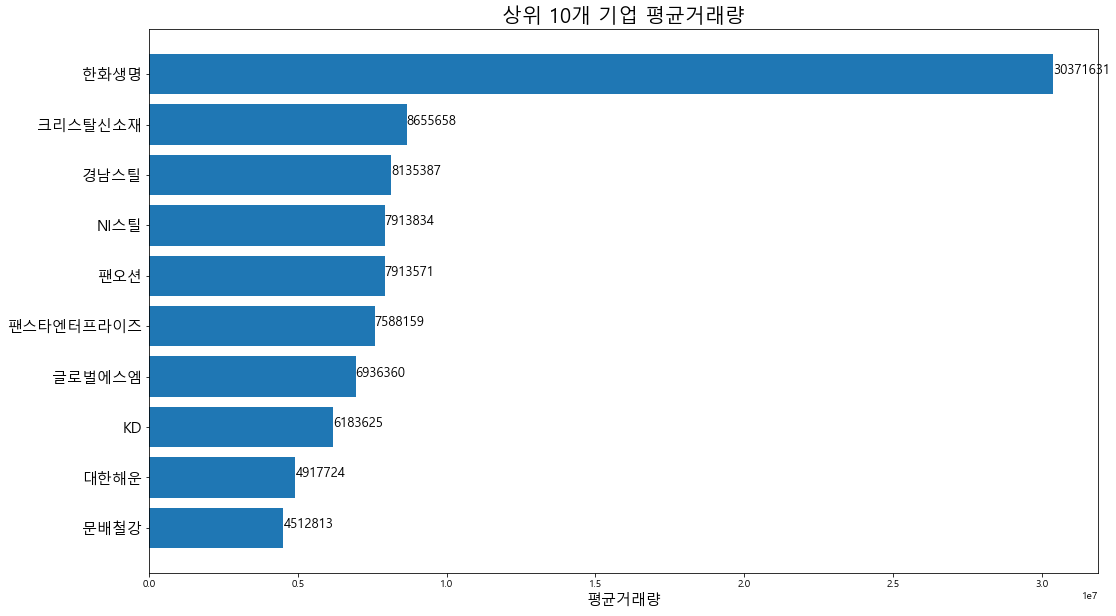

In [17]:
attr = data['회사명'][4:]
v1 = data['평균거래량'][4:]

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('상위 10개 기업 평균거래량', fontsize=20)
plt.xlabel('평균거래량', fontsize=15)
plt.yticks(fontsize=15)

for i in data[4:].index:
    detail = '%d'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

## 3.2 거래대금 상위 10개 기업

In [18]:
data = m_data.sort_values(by='거래대금(백만)').reset_index(drop=True)
print(len(data))

14


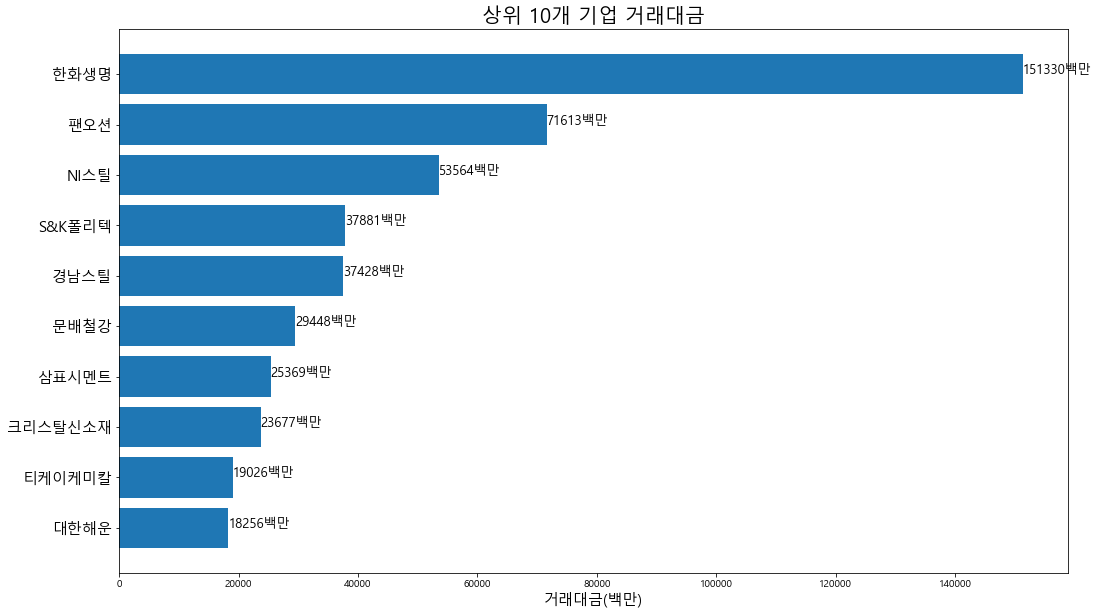

In [19]:
attr = data['회사명'][4:]
v1 = data['거래대금(백만)'][4:]

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('상위 10개 기업 거래대금', fontsize=20)
plt.xlabel('거래대금(백만)', fontsize=15)
plt.yticks(fontsize=15)

for i in data[4:].index:
    detail = '%d백만'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

## 3.3 업종별 거래량 평균

In [20]:
volume_mean = m_data.groupby('업종2')['평균거래량'].mean().sort_values()
print(len(volume_mean))
volume_mean

9


업종2
섬유,의류,신발,호화품    1.761740e+06
전자장비와기기         3.160019e+06
건축자재            4.013295e+06
건설              6.183626e+06
해운사             6.415648e+06
화학              6.522542e+06
철강              6.854012e+06
자동차부품           7.262260e+06
생명보험            3.037163e+07
Name: 평균거래량, dtype: float64

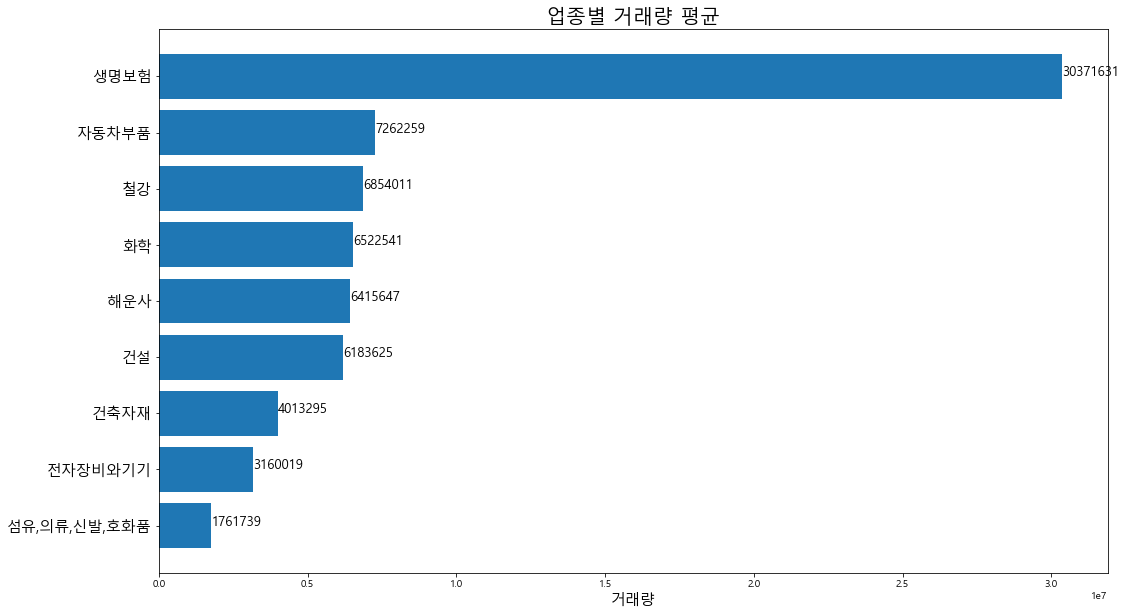

In [21]:
attr = volume_mean.index
v1 = volume_mean

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('업종별 거래량 평균', fontsize=20)
plt.xlabel('거래량', fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(v1)):
    detail = '%d'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

## 3.4 업종별 거래대금 평균

In [22]:
volume_mean = m_data.groupby('업종2')['거래대금(백만)'].mean().sort_values()
print(len(volume_mean))
volume_mean

9


업종2
섬유,의류,신발,호화품      6153.000000
자동차부품             7359.000000
건설                9868.000000
화학               21351.500000
건축자재             25369.000000
전자장비와기기          37881.000000
철강               40146.666667
해운사              44934.500000
생명보험            151330.000000
Name: 거래대금(백만), dtype: float64

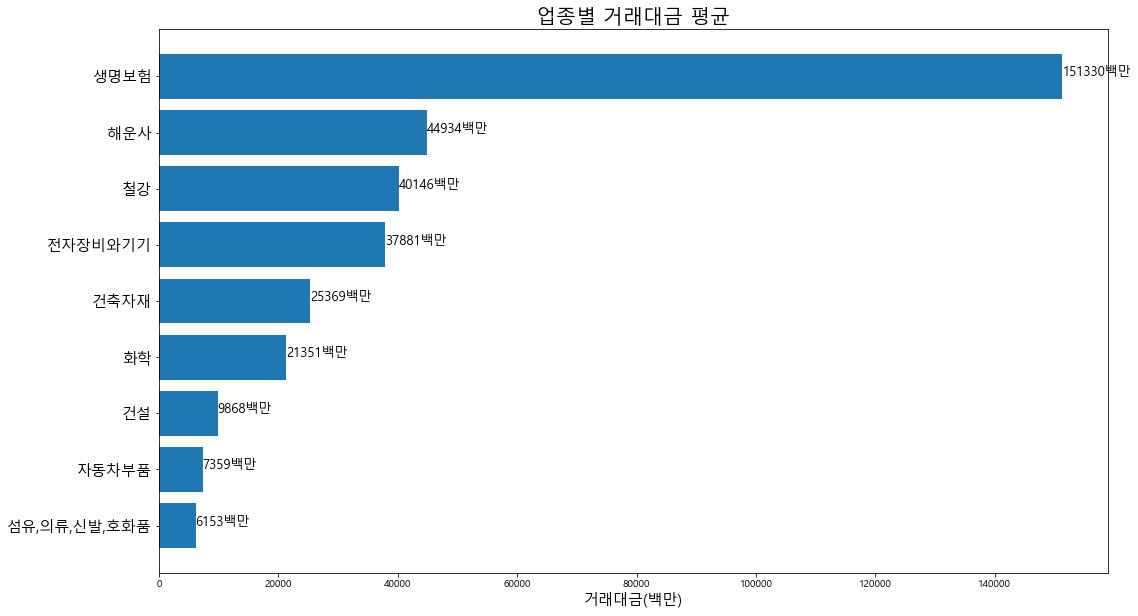

In [23]:
attr = volume_mean.index
v1 = volume_mean

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('업종별 거래대금 평균', fontsize=20)
plt.xlabel('거래대금(백만)', fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(v1)):
    detail = '%d백만'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

- **평균거래량** : 한화생명 > 크리스탈신소재 > 경남스틸 > NI스틸 > 팬오션 > 팬스타엔터프라이즈 > 글로벌에스엠 > KD > 대한해운 > 문배철강


- **거래대금** : 한화생명 > 팬오션 > NI스틸 > S&K폴리텍 > 경남스틸 > 문배철강 > 삼표시멘트 > 크리스탈신소재 > 티케이케미칼 > 대한해운


- **업종별 거래량 평균** : 생명보험 > 자동차부품 > 철강 > 화학 > 해운사 > 건설 > 건축자재 > 전자장비와기기 > 섬유,의류,신발,호화품


- **업종별 거래대금 평균** : 생명보험 > 해운사 > 철강 > 전자장비와기기 > 건축자재 > 화학 > 건설 > 자동차부품 > 섬유,의류,신발,호화품